In [2]:
library(CellChat)
library(tidyverse)
library(Seurat)

In [3]:
setwd('/import/DB/minidir//a.fel/BJTC-204')

In [4]:
sce = readRDS('male.sc.rds')

In [5]:
sce$celltype = factor(sce$celltype,levels = c('Ast','ExN','InN','OPC','Oli','End','Mic'))

In [6]:
load('/import/scRNA_fang/data/matrix/color.rda')

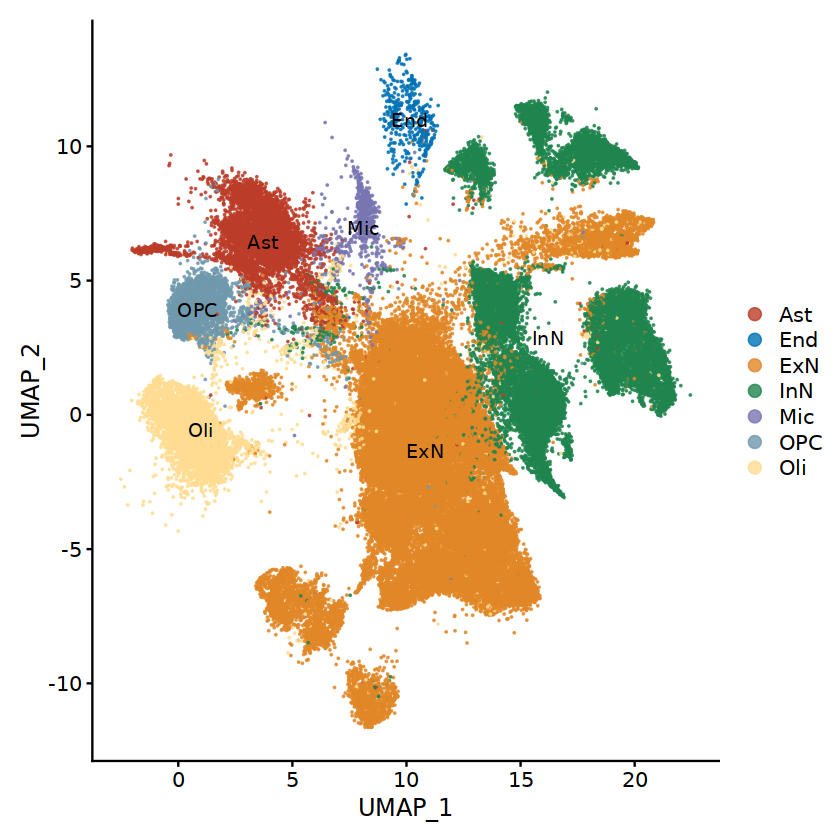

In [9]:
DimPlot(sce,label = T,cols = color)

In [10]:
ggsave('./figure2/singlecell/umap1.pdf',width = 6,height = 5)

In [11]:
Idents(sce) = 'celltype'
DefaultAssay(sce) = 'RNA'
sce.markers <- FindAllMarkers(object = sce, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster Ast

Calculating cluster ExN

Calculating cluster InN

Calculating cluster OPC

Calculating cluster Oli

Calculating cluster End

Calculating cluster Mic



In [12]:
library(dplyr) 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(6, avg_log2FC)

In [13]:
scRNA = sce

In [14]:
gene_cell_exp <- AverageExpression(scRNA,
                                   features = unique(top5$gene),
                                   group.by = 'celltype',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)

In [15]:
colnames(gene_cell_exp)

[1] "Ast" "ExN" "InN" "OPC" "Oli" "End" "Mic"

In [16]:
gene_cell_exp = gene_cell_exp[,c('Ast','ExN','InN','OPC','Oli','End','Mic')]

In [17]:
library(ComplexHeatmap)
df <- data.frame(colnames(gene_cell_exp))
colnames(df) <- 'class'

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [18]:
df$class = factor(df$class,levels =c('Ast','ExN','InN','OPC','Oli','End','Mic'))

In [19]:
top_anno = HeatmapAnnotation(df = df,
                             border = T,
                             show_annotation_name = F,
                             gp = gpar(col = 'black'),
                             col = list(class = c('Ast' = '#A0CCFF','ExN'="#2F528F",
                                                  "InN"="#E3AD68",'OPC'='#84CAC0','Oli'='#F5AE6B','End'='#BCB8D3',
                                                 'Mic'='#4387B5')))

In [20]:
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))

In [21]:
options(repr.plot.height = 8,repr.plot.width = 6)

In [24]:
p = Heatmap(marker_exp,
        cluster_rows = F,
        cluster_columns = F,
        show_column_names = F,
        show_row_names = T,
        column_title = NULL,
        heatmap_legend_param = list(
          title=' '),
        col = colorRampPalette(c("#528EE5","white","#E35B10"))(100),
        border = 'black',
        rect_gp = gpar(col = "black", lwd = 1),
        row_names_gp = gpar(fontsize = 13),
        column_names_gp = gpar(fontsize = 13),
        top_annotation = top_anno)

In [26]:
pdf('./figure2/singlecell/marker.pdf',height = 8,width = 6)
p
dev.off()

png 
  2

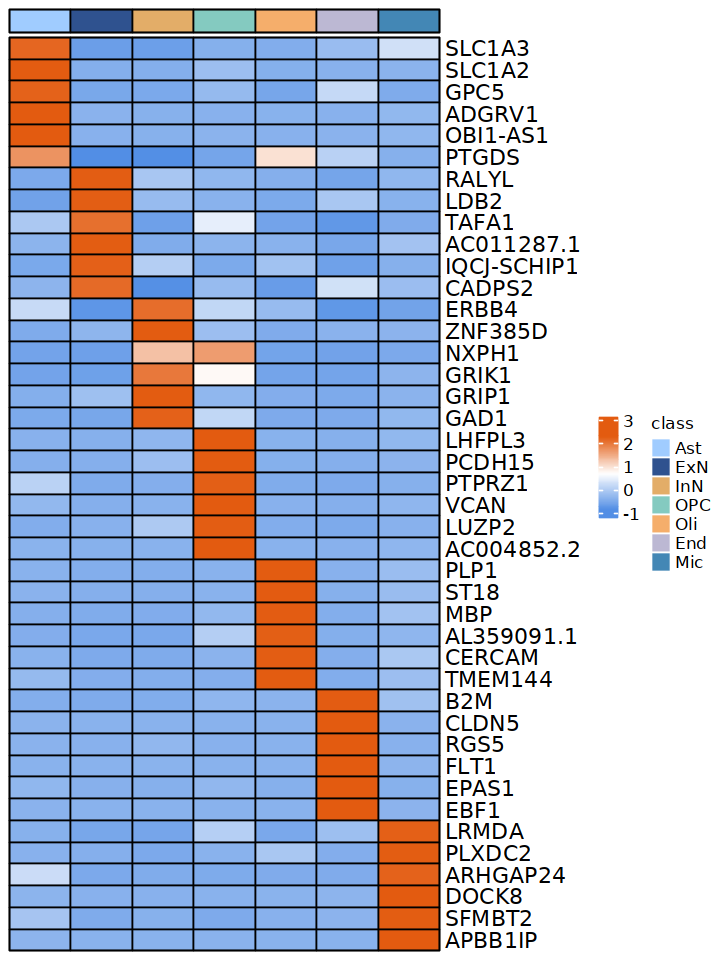

In [27]:
p

In [28]:
library(GSVA)
library(tidyverse)
library(org.Hs.eg.db)
Idents(scRNA) <- "celltype" 
expr <- AverageExpression(scRNA, assays = "RNA", slot = "data")[[1]]
expr <- expr[rowSums(expr)>0,]  
expr <- as.matrix(expr)
# library(msigdbr)
# msigdbr_species() 

Warning message:
"package 'GSVA' was built under R version 4.2.3"
Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: IRanges

Warning message:
"package 'IRanges' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"

Attaching package: 'S4Vectors'


The following objects are masked from 'package:lubridate':

    second, second<-


The following object is masked from 'package:tidyr':

    expand


The following objects are masked from 'package:dplyr':

    first, rename


The following objects are masked from 'package:base':

    I, expand.grid, unname



Attaching package: 'IRanges'


The following object is masked from 'package:lubridate':

    %within%


The following object is masked from 'package:purrr':

    reduce


The following objects are masked from 'package:dplyr':



In [29]:
d = '/import/DB' 

In [30]:
gmtfs <- list.files(d,pattern = '.gmt')  
gmtfs

[1] "BP.gmt"                   "h.all.v7.5.1.symbols.gmt"
[3] "kegg.gmt"

In [31]:
library(GSEABase)

Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: annotate

Warning message:
"package 'annotate' was built under R version 4.2.2"
Loading required package: XML

Loading required package: graph

Warning message:
"package 'graph' was built under R version 4.2.3"

Attaching package: 'graph'


The following object is masked from 'package:XML':

    addNode


The following object is masked from 'package:stringr':

    boundary


The following objects are masked from 'package:igraph':

    degree, edges, intersection




In [32]:
kegg_list <- getGmt(file.path(d,gmtfs[3])) 
go_list <- getGmt(file.path(d,gmtfs[1])) 
hall_list <- getGmt(file.path(d,gmtfs[2])) 

Warning message in getGmt(file.path(d, gmtfs[3])):
"28 record(s) contain duplicate ids: Alzheimer disease, Amyotrophic lateral sclerosis, ..., Spliceosome, Starch and sucrose metabolism"
Warning message in getGmt(file.path(d, gmtfs[1])):
"2 record(s) contain duplicate ids: GOBP_CIRCULATORY_SYSTEM_DEVELOPMENT, GOBP_PROTEOLYSIS_INVOLVED_IN_PROTEIN_CATABOLIC_PROCESS"


In [33]:
human_KEGG_Set = go_list
library(GSVA)
gsva.kegg <- gsva(expr, gset.idx.list = human_KEGG_Set, 
             kcdf="Gaussian",
             method = "gsva",
             parallel.sz=1)
head(gsva.kegg)

dim(gsva.kegg)

a = c()
ds = as.data.frame(gsva.kegg) 
for (i in 1:dim(ds)[2] ){
    path = ds[ order (-ds[,i]),] %>%  head(5) %>%  rownames()
    a = unique(c(a,path))
 }
gsva.kegg = gsva.kegg[a,]
options(repr.plot.width = 9,repr.plot.height =  8)
rownames(gsva.kegg) = gsub('GOBP_','',rownames(gsva.kegg))
rownames(gsva.kegg)= tolower(rownames(gsva.kegg))

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
"Some gene sets have size one. Consider setting 'min.sz > 1'."


Estimating GSVA scores for 7643 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



,Ast,ExN,InN,OPC,Oli,End,Mic
GOBP_10_FORMYLTETRAHYDROFOLATE_METABOLIC_PROCESS,-0.0420058,-0.1881136,0.13172847,0.40761998,-0.26365738,-0.4119037,0.20628795
GOBP_2FE_2S_CLUSTER_ASSEMBLY,-0.3078636,-0.4820310,0.16909301,-0.43529594,-0.22555107,0.5483903,-0.22190716
GOBP_2_OXOGLUTARATE_METABOLIC_PROCESS,0.5571189,-0.4548155,0.09644607,-0.21382029,0.07989124,-0.2464716,-0.13898507
GOBP_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS,-0.1333258,0.1417053,0.27101460,0.21421266,-0.49923129,0.2593331,-0.05729313
GOBP_3_UTR_MEDIATED_MRNA_DESTABILIZATION,-0.2363483,-0.6619412,-0.45044681,0.01105348,0.07738911,0.3350617,0.50796929
GOBP_3_UTR_MEDIATED_MRNA_STABILIZATION,-0.3728464,-0.3641077,-0.43646096,-0.27622136,-0.12059882,0.4517280,0.44105608


[1] 7643    7

In [34]:
options(repr.plot.width = 14,repr.plot.height = 8)

Warning message:
"package 'pheatmap' was built under R version 4.2.3"

Attaching package: 'pheatmap'


The following object is masked from 'package:ComplexHeatmap':

    pheatmap




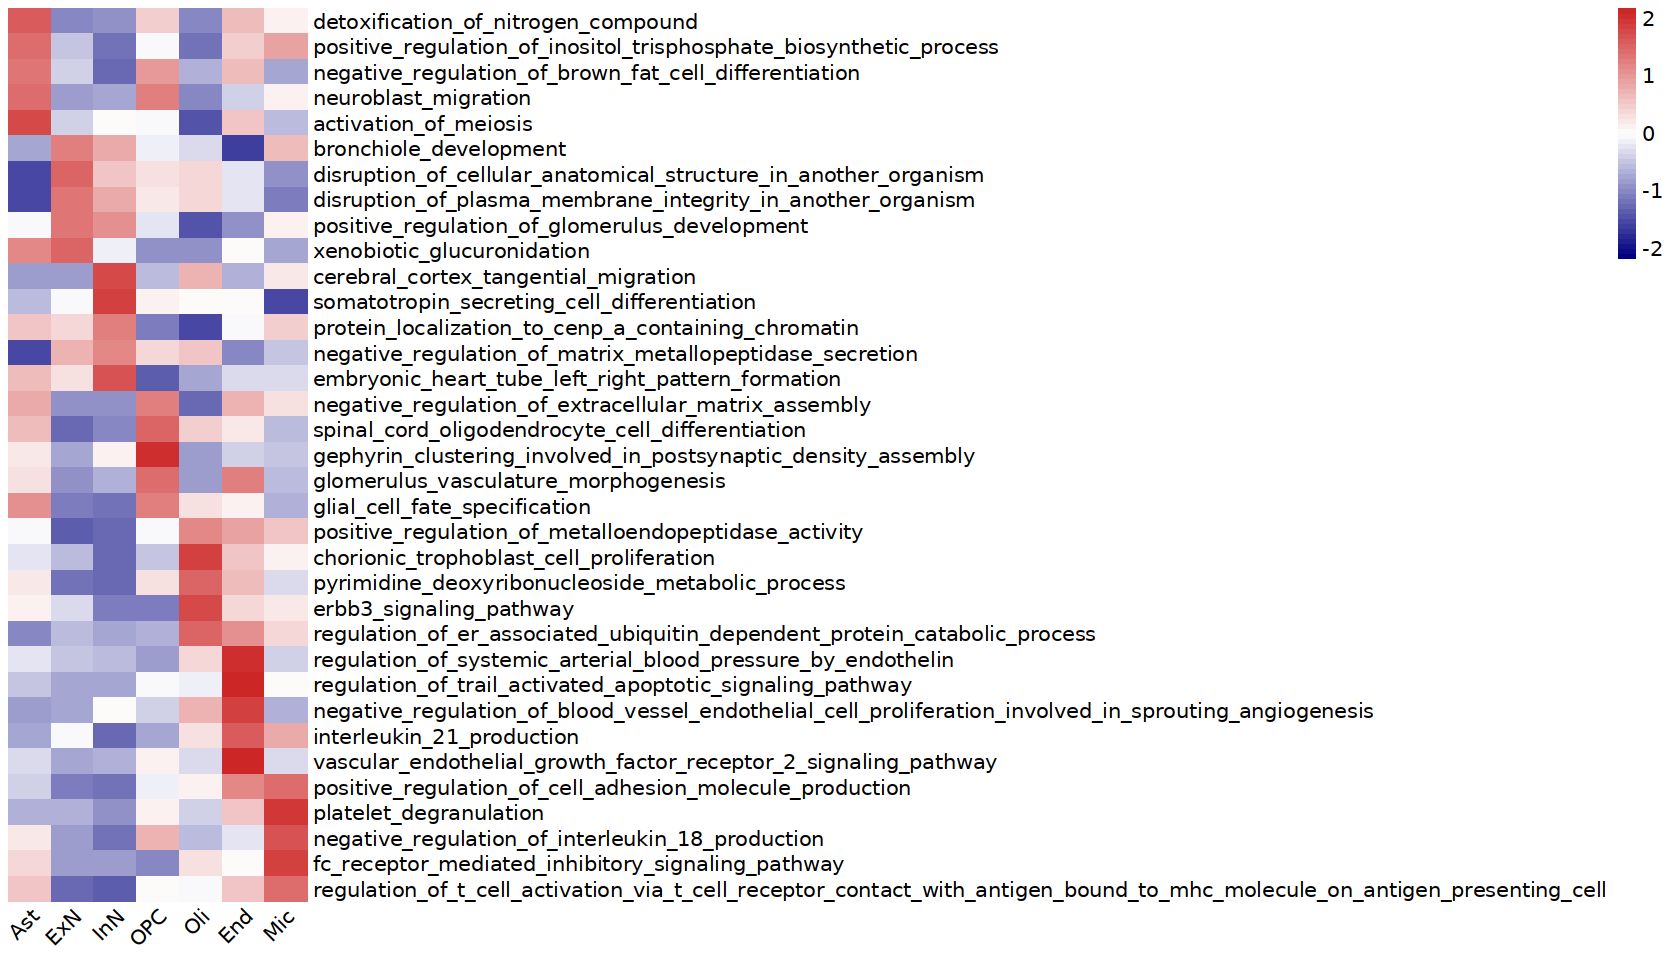

In [35]:
library(pheatmap)
p = pheatmap(gsva.kegg, scale = "row",angle_col = "45",cluster_cols  = FALSE,cluster_rows = FALSE,fontsize = 12,
        #      show_column_names = FALSE,
        # show_row_names = TRUE,
             color = colorRampPalette(c("navy", "white", "firebrick3"))(50))

In [36]:
pdf('./figure2/singlecell/BP.pdf',width = 16,height = 9)
p
dev.off()

png 
  2

### kegg

In [37]:
human_KEGG_Set = kegg_list
library(GSVA)
gsva.kegg <- gsva(expr, gset.idx.list = human_KEGG_Set, 
             kcdf="Gaussian",
             method = "gsva",
             parallel.sz=1)
head(gsva.kegg)

dim(gsva.kegg)

a = c()
ds = as.data.frame(gsva.kegg) 
for (i in 1:dim(ds)[2] ){
    path = ds[ order (-ds[,i]),] %>%  head(5) %>%  rownames()
    a = unique(c(a,path))
 }
gsva.kegg = gsva.kegg[a,]
options(repr.plot.width = 9,repr.plot.height =  8)
#rownames(gsva.kegg) = gsub('GOBP_','',rownames(gsva.kegg))
#rownames(gsva.kegg)= tolower(rownames(gsva.kegg))

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Estimating GSVA scores for 346 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



,Ast,ExN,InN,OPC,Oli,End,Mic
Glycolysis / Gluconeogenesis,0.16983495,-0.2818550,-0.05889967,-0.36391770,-0.2140274,0.32108939,0.06152707
Citrate cycle (TCA cycle),-0.12295563,-0.4476881,0.31767651,-0.68267623,-0.3057876,0.43648481,0.24255945
Pentose and glucuronate interconversions,0.03802982,-0.1234912,-0.12889470,0.06922217,0.3665668,0.03068221,-0.20049154
Fructose and mannose metabolism,0.25905918,-0.2303013,-0.35061038,-0.37601457,-0.1065604,0.12282398,0.12895685
Galactose metabolism,0.29429613,-0.3849245,-0.32513044,-0.24462851,-0.2375217,0.13128822,0.29049163
Ascorbate and aldarate metabolism,0.12675138,-0.3065928,-0.12822688,0.16655024,0.2598408,0.20785644,-0.09056654


[1] 346   7

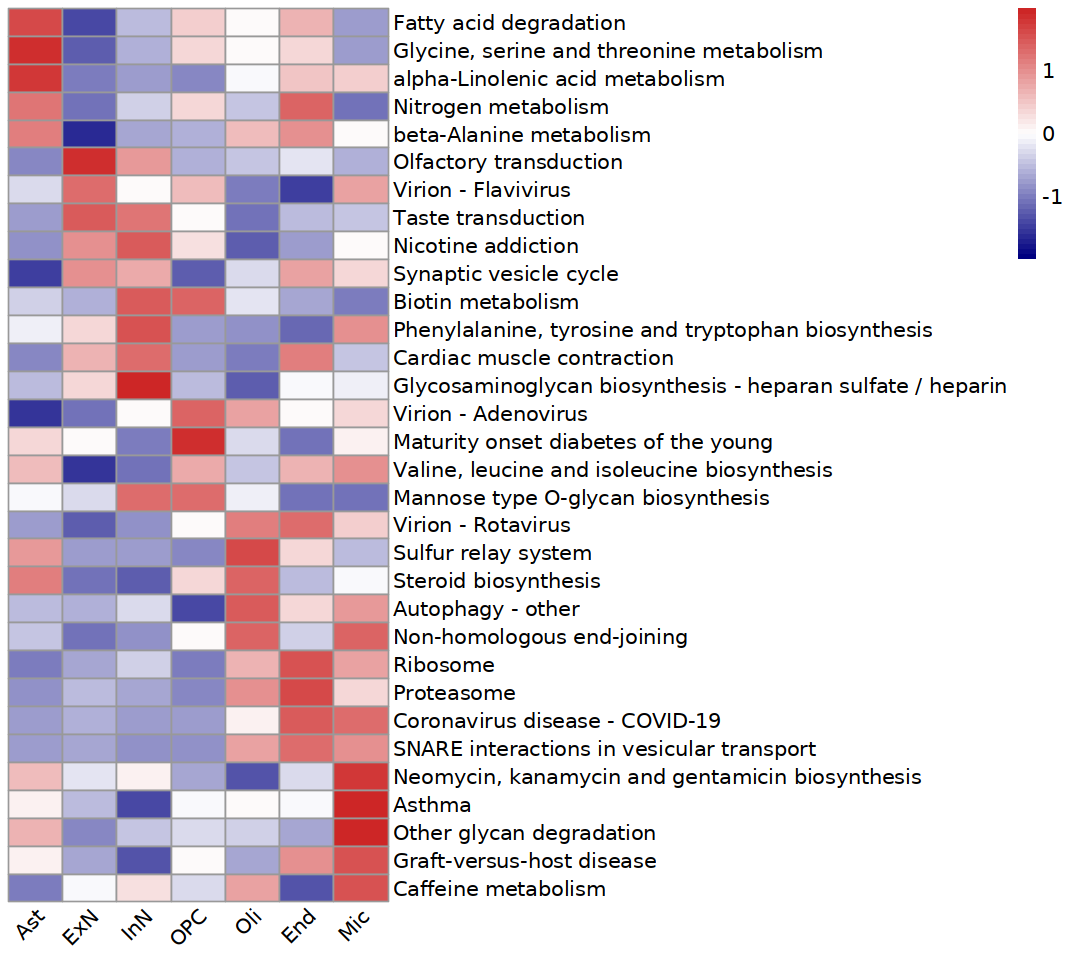

In [38]:
library(pheatmap)
p = pheatmap(gsva.kegg, scale = "row",angle_col = "45",cluster_cols  = FALSE,cluster_rows = FALSE,fontsize = 12,
        #      show_column_names = FALSE,
        # show_row_names = TRUE,
             color = colorRampPalette(c("navy", "white", "firebrick3"))(50))

In [39]:
pdf('./figure2/singlecell/kegg.pdf',width = 9,height = 9)
p
dev.off()

png 
  2

In [51]:
scedata = scRNA

In [52]:
scedata$orig.ident = scedata$sample
Idents(scedata) = 'celltype'
table(scedata$orig.ident)#
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#
Cellratio <- data.frame(Cellratio)
library(reshape2)
cellper <- dcast(Cellratio,Var2~Var1, value.var = "Freq")#
rownames(cellper) <- cellper[,1]
cellper <- cellper[,-1]
sample <- rownames(cellper)
sample


   M1   M10   M11   M12   M13   M14   M15   M16   M17   M18   M19    M2   M20 
 2808  2516  3879  2045  2099  1830  3788  1269  3550  1555  2560  2013  4346 
  M21   M22   M23   M24 M24_2   M26   M27   M28   M29    M3   M30   M31   M32 
 2109  2097  4024   668   645  1931  1173  2370  2050  1362  2152  3293  2549 
  M33   M34    M4    M5    M6    M7    M8    M9 
 2355  3174  2413  1271  2655  2246  1882  1302 


        Ast         ExN         InN         OPC         Oli         End 
0.071839854 0.564998269 0.225688968 0.046409931 0.074994550 0.005283474 
        Mic 
0.010784955 

     
        M1  M10  M11  M12  M13  M14  M15  M16  M17  M18  M19   M2  M20  M21
  Ast   16   23  622  337  263    8  419  119  109   46  197  387  292   74
  ExN 1860 1594 2081  714 1118 1072 1938  480 2467  818 1537 1193 1979 1265
  InN  707  383  618  344  413  553  776  482  809  359  563  297  728  364
  OPC  138  130  117  197  106   57  272  140   63  107  161   49  248  149
  Oli   70  343  365  376  178   63  328   25   88  167   81   76  966  237
  End    9   16   27   26   11   13   39    7    1   19   16    4   32    9
  Mic    8   27   49   51   10   64   16   16   13   39    5    7  101   11
     
       M22  M23  M24 M24_2  M26  M27  M28  M29   M3  M30  M31  M32  M33  M34
  Ast   50   14    6     2  129  195   70  107  301   29  465   88  284   29
  ExN 1386 3439  359   401  859  435 1616  995  408 1377 1573 1438  770 2165
  InN  489  491  237   227  704  343  414  604  412  567  623  667  886  783
  OPC   91    3   31     3  129   77   51  118   84   94  148  152  149 

Warning message:
"package 'reshape2' was built under R version 4.2.3"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




[1] "M1"    "M10"   "M11"   "M12"   "M13"   "M14"   "M15"   "M16"   "M17"  
[10] "M18"   "M19"   "M2"    "M20"   "M21"   "M22"   "M23"   "M24"   "M24_2"
[19] "M26"   "M27"   "M28"   "M29"   "M3"    "M30"   "M31"   "M32"   "M33"  
[28] "M34"   "M4"    "M5"    "M6"    "M7"    "M8"    "M9"

In [58]:
scRNA$group = scRNA$Condition

In [60]:
samples = scRNA@meta.data[,c('sample','group')]

In [62]:
samples = samples[!duplicated(samples$sample),]

In [63]:
head(samples,2)

,sample,group
,<fct>,<chr>
M1.AAACCTGAGACCTTTG-1.Ast.Ast1,M1,Case
M10.AAACCTGCAGACAAGC-1.InN.InN4_VIP,M10,Case


In [65]:
rownames(samples)=samples$sample
cellper$sample <- samples[rownames(cellper),'sample']#
cellper$group <- samples[rownames(cellper),'group']#
pplist = list()
sce_groups = unique(scRNA$celltype)

In [67]:
table(samples$group)


   Case Control 
     17      17 

In [70]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)
for(group_ in sce_groups){
  cellper_  = cellper %>% dplyr::select(one_of(c('sample','group',group_)))#
  colnames(cellper_) = c('sample','group','percent')#
  cellper_$percent = as.numeric(cellper_$percent)
  cellper_ <- cellper_ %>% group_by(group) %>% mutate(upper =  quantile(percent, 0.75), 
                                                      lower = quantile(percent, 0.25),
                                                      mean = mean(percent),
                                                      median = median(percent))#
# print(group_)
print(cellper_$median)
      pp1 =ggplot(cellper_,aes(x=group,y=percent)) + #
    geom_jitter(shape = 21,aes(fill=group),width = 0.25,size = 3) + 
    stat_summary(fun=mean, geom="point", color="grey60") +
    theme_cowplot() +
    theme(axis.text = element_text(size = 10),axis.title = element_text(size = 10),legend.text = element_text(size = 10),
          legend.title = element_text(size = 10),plot.title = element_text(size = 10,face = 'plain'),legend.position = 'none') + 
    labs(title = group_,y='Percentage') +
    geom_errorbar(aes(ymin = lower, ymax = upper),col = "grey60",width =  1)
  labely = max(cellper_$percent)
  compare_means(percent ~ group,  data = cellper_)
  my_comparisons <- list( c("Control", "Case") )
  pp1 = pp1 + stat_compare_means(comparisons = my_comparisons,size = 3,method = "t.test")
  pplist[[group_]] = pp1
}
options(repr.plot.height = 10,repr.plot.width = 9)

 [1] 0.02958199 0.02958199 0.02958199 0.11061246 0.11061246 0.02958199
 [7] 0.11061246 0.11061246 0.02958199 0.02958199 0.11061246 0.11061246
[13] 0.11061246 0.11061246 0.11061246 0.02958199 0.11061246 0.11061246
[19] 0.02958199 0.11061246 0.02958199 0.11061246 0.11061246 0.02958199
[25] 0.11061246 0.02958199 0.02958199 0.02958199 0.02958199 0.02958199
[31] 0.02958199 0.11061246 0.02958199 0.11061246
 [1] 0.6105429 0.6105429 0.6105429 0.5116156 0.5116156 0.6105429 0.5116156
 [8] 0.5116156 0.6105429 0.6105429 0.5116156 0.5116156 0.5116156 0.5116156
[15] 0.5116156 0.6105429 0.5116156 0.5116156 0.6105429 0.5116156 0.6105429
[22] 0.5116156 0.5116156 0.6105429 0.5116156 0.6105429 0.6105429 0.6105429
[29] 0.6105429 0.6105429 0.6105429 0.5116156 0.6105429 0.5116156
 [1] 0.2517806 0.2517806 0.2517806 0.2199219 0.2199219 0.2517806 0.2199219
 [8] 0.2199219 0.2517806 0.2517806 0.2199219 0.2199219 0.2199219 0.2199219
[15] 0.2199219 0.2517806 0.2199219 0.2199219 0.2517806 0.2199219 0.2517806
[22] 0

In [72]:
 library(cowplot)
pdf('./figure2/singlecell//dotplot.compare.pdf',width = 9,height = 10)
plot_grid(pplist[[1]],
          pplist[[2]],
          pplist[[3]],
          pplist[[4]],
          pplist[[5]],
          pplist[[6]],
          pplist[[7]])
dev.off()

png 
  2